#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling - Decision Trees 1 <br> Date Updated: 01/20/2022

In [1]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from sklearn.model_selection import train_test_split

In [2]:
pwd()

'C:\\Dhruv\\Data\\4_Machine_Learning_with_Python\\3_Supervised Learning Essential Training\\Phase II - Modelling\\2_Dec Trees_v2_01.20.2022'

In [3]:
does = pd.read_csv('1_readonly/Services.csv')

In [4]:
does.head()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
0,40,0,1,1,11,0,0,0,0,0,0,1
1,40,0,1,1,11,0,0,0,0,0,0,1
2,50,0,1,1,14,0,0,0,1,0,0,0
3,50,0,1,1,14,0,0,0,1,0,0,0
4,53,0,1,1,14,0,0,0,1,0,0,0


In [5]:
does.tail()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
38258,19,0,2,1,14,0,0,0,1,0,0,0
38259,22,0,2,1,14,0,0,0,1,0,0,0
38260,18,0,2,1,14,0,0,0,1,0,0,0
38261,20,0,1,1,11,0,0,0,1,0,0,0
38262,37,0,2,1,16,0,0,0,1,0,0,0


In [6]:
does.describe()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
count,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000
mean,35.537647,0.043515,1.450226,1.047409,14.735201,0.017693,0.014740,0.004757,0.867731,0.002091,0.026945,0.280950
std,13.070649,0.204015,0.499410,0.298709,3.630815,0.131836,0.120512,0.068804,0.338787,0.045678,0.161925,0.449469
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,2.000000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,83.000000,1.000000,2.000000,4.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Check for missing data
total = does.isnull().sum().sort_values(ascending=False)
print(total)

Employed                0
Race_White              0
Race_PacificIslander    0
Race_AfricanAmerican    0
Race_Asian              0
Race_NativeAmerican     0
Race_Hispanic           0
EducationLevel          0
CitizenStatus           0
Gender                  0
Disability              0
Age_AtReg               0
dtype: int64


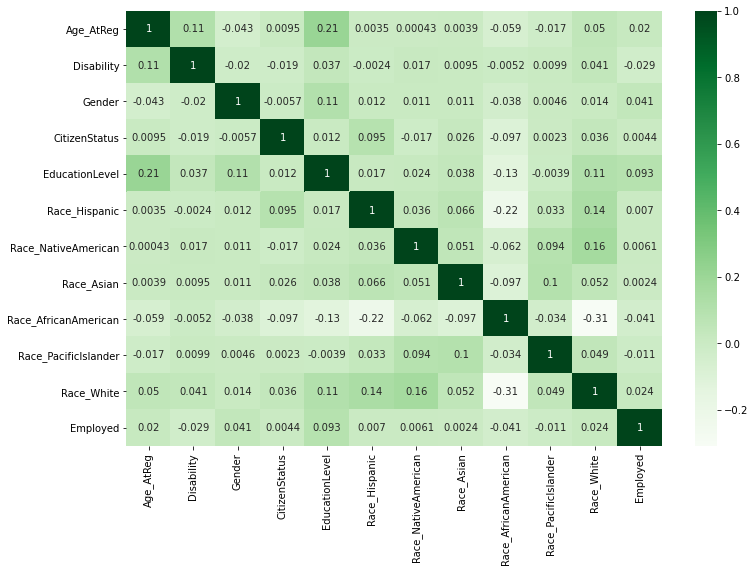

In [8]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(does.corr(), cmap='Greens', annot=True)
plt.show()

In [9]:
does.corr()[['Employed']].sort_values(by='Employed', ascending = False)

,Employed
Employed,1.000000
EducationLevel,0.093169
Gender,0.041109
Race_White,0.023823
Age_AtReg,0.020021
Race_Hispanic,0.006967
Race_NativeAmerican,0.006053
CitizenStatus,0.004352
Race_Asian,0.002423
Race_PacificIslander,-0.010790


In [10]:
# proportion of employed variable
does['Employed'].value_counts()

0    27513
1    10750
Name: Employed, dtype: int64

In [11]:
does.columns

Index(['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel',
       'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian',
       'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White',
       'Employed'],
      dtype='object')

In [12]:
features = ['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White']

X = does[features]
y = does['Employed']

print(X)
print(y)

       Age_AtReg  Disability  Gender  CitizenStatus  EducationLevel  \
0             40           0       1              1              11   
1             40           0       1              1              11   
2             50           0       1              1              14   
3             50           0       1              1              14   
4             53           0       1              1              14   
...          ...         ...     ...            ...             ...   
38258         19           0       2              1              14   
38259         22           0       2              1              14   
38260         18           0       2              1              14   
38261         20           0       1              1              11   
38262         37           0       2              1              16   

       Race_Hispanic  Race_NativeAmerican  Race_Asian  Race_AfricanAmerican  \
0                  0                    0           0               

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.253679 to fit



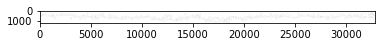

In [14]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()